In [1]:
%config Completer.use_jedi = False

### Importing libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import tree

from sklearn.preprocessing import StandardScaler, PowerTransformer


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score


%matplotlib inline

### Loading the data

In [3]:
rawData = pd.read_csv('./data/forestfires.csv')

### Exploratory Analysis

#### Nulls

In [4]:
rawData.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

#### Summary

In [5]:
rawData.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### Rain Column

In [6]:
print(len(rawData[rawData['rain'] > 0]))

rawData[rawData['rain'] > 0]

8


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00
286,7,6,jul,wed,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
500,8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
501,7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17


##### Rain column is COMPLETELY useless

In [7]:
rawData.drop(labels=['rain'], axis = 1, inplace=True)

#### Explore distribution of area values

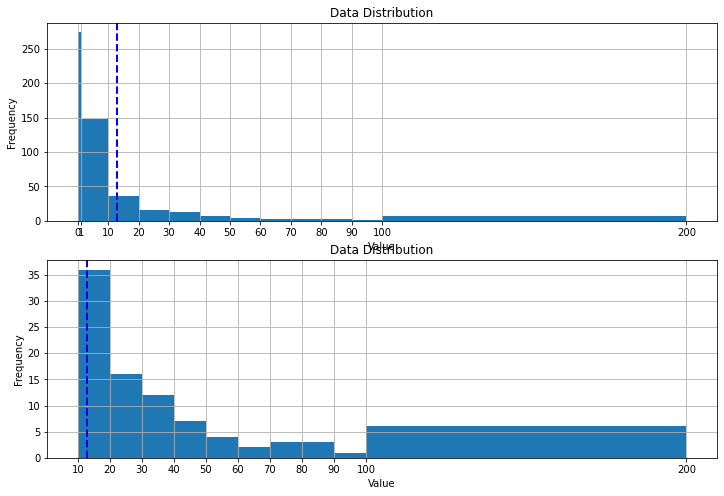

In [8]:
# Get the variable to examine
histData = rawData['area']

meanVal = histData.mean()

# Create a Figure
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.hist(histData, bins=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.axvline(x=meanVal, color = 'blue', linestyle='dashed', linewidth = 2)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.xticks(ticks=[0, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2,1,2)
plt.hist(histData, bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.axvline(x=meanVal, color = 'blue', linestyle='dashed', linewidth = 2)
plt.title('Data Distribution')
plt.xlabel('Value')
plt.xticks(ticks=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

#### Explore the distribution of other values

In [9]:
print('The number of records with zero burnt area is:  {}'
      .format(len(rawData[rawData['area'] == 0])))

print('The number of records with non zero burnt area is:  {}'
      .format(len(rawData[rawData['area'] != 0])))

print("The number of records with burnt area between 0 and 1 hectares is:  {}"
      .format(len(rawData.loc[(rawData['area'] > 0) & (rawData['area'] <= 1)])))

The number of records with zero burnt area is:  247
The number of records with non zero burnt area is:  270
The number of records with burnt area between 0 and 1 hectares is:  27


In [10]:
limits = [10, 50, 100, 200, 500, 1000, 1100]

for each in limits:
    
    print('Burnt area more than {} hectares is:  {}'
          .format(each, len(rawData[rawData['area'] > each])))

Burnt area more than 10 hectares is:  95
Burnt area more than 50 hectares is:  24
Burnt area more than 100 hectares is:  11
Burnt area more than 200 hectares is:  5
Burnt area more than 500 hectares is:  2
Burnt area more than 1000 hectares is:  1
Burnt area more than 1100 hectares is:  0


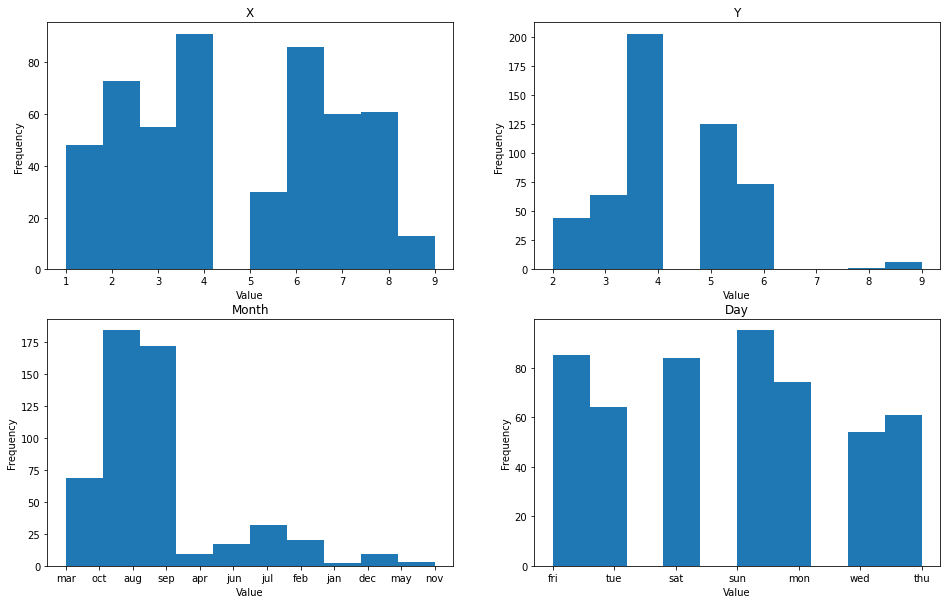

In [11]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(rawData['X'])
plt.grid(False)
plt.title('X')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(rawData['Y'])
plt.grid(False)
plt.title('Y')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(rawData['month'])
plt.grid(False)
plt.title('Month')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(rawData['day'])
plt.grid(False)
plt.title('Day')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

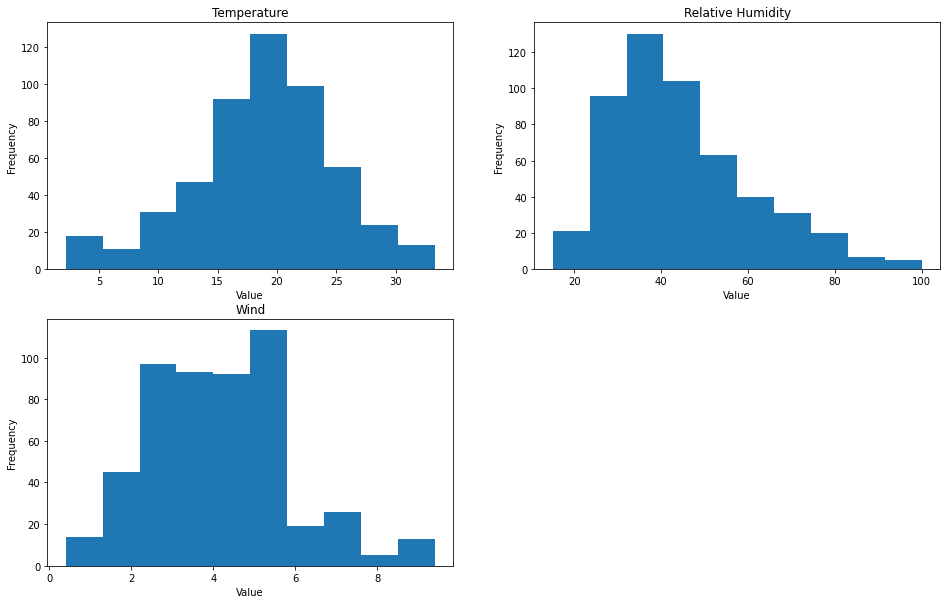

In [12]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(rawData['temp'])
plt.grid(False)
plt.title('Temperature')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(rawData['RH'])
plt.grid(False)
plt.title('Relative Humidity')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(rawData['wind'])
plt.grid(False)
plt.title('Wind')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

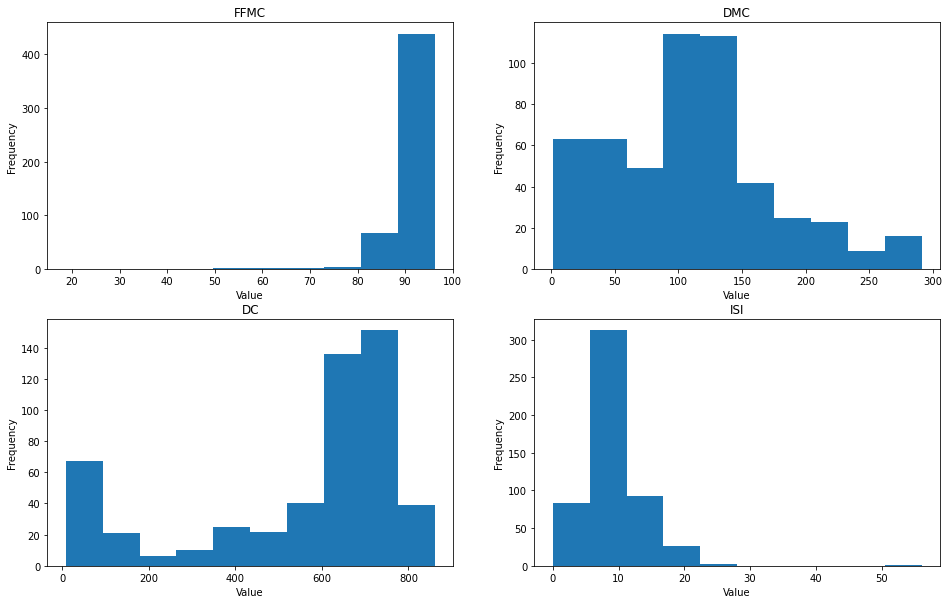

In [13]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.hist(rawData['FFMC'])
plt.grid(False)
plt.title('FFMC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(rawData['DMC'])
plt.grid(False)
plt.title('DMC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(rawData['DC'])
plt.grid(False)
plt.title('DC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(rawData['ISI'])
plt.grid(False)
plt.title('ISI')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

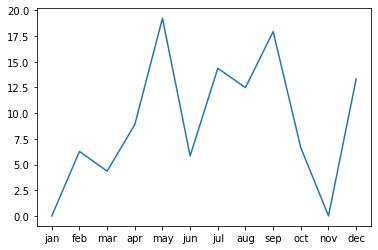

In [14]:
months = {'jan' : 0, 'feb' : 1, 'mar' : 2, 'apr' : 3, 'may' : 4, 'jun' : 5, 'jul' : 6,
               'aug' : 7, 'sep' : 8, 'oct' : 9, 'nov' : 10, 'dec' : 11}

plt.plot(rawData[['month', 'area']].groupby(by='month').agg('mean').sort_values(by='month', key = lambda x: x.map(months)))

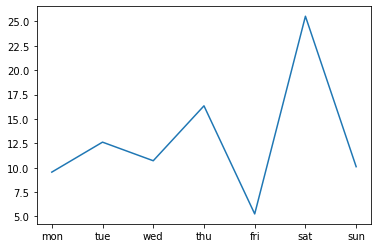

In [15]:
months = {'mon' : 0, 'tue' : 1, 'wed' : 2, 'thu' : 3, 'fri' : 4, 'sat' : 5, 'sun' : 6}

plt.plot(rawData[['day', 'area']].groupby(by='day').agg('mean').sort_values(by='day', key = lambda x: x.map(months)))

#### Create the Burn Flag

##### Add a flag column

##### 0 Burn = 0
##### Non 0 burn = 1

In [16]:
areaValues = rawData[['area']].values

In [17]:
areaFlag = []

for each in areaValues:
    
    if each[0] == 0:
        
        areaFlag.append(0)
        
    else:
        
        areaFlag.append(1)

In [18]:
rawData['burn'] = areaFlag

#### Create a dataset without outliers

In [19]:
thirdQuartile = rawData[['area']].describe().at['75%', 'area']

firstQuartile = rawData[['area']].describe().at['25%', 'area']

IQR = thirdQuartile - firstQuartile

outlierLimit = 1.5 * IQR

In [20]:
outlierLimit

9.855

In [21]:
print(len(rawData[rawData['area'] > outlierLimit]))

97


In [22]:
cleanDF = rawData[rawData['area'] <= outlierLimit]

In [23]:
cleanDF.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,area,burn
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,4.611905,4.302381,90.620714,109.586190,543.507857,9.078333,18.884762,44.509524,3.948095,1.515357,0.411905
std,2.312021,1.253727,5.767668,62.958875,249.958323,4.634413,5.638184,16.240655,1.763383,2.486176,0.492765
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,69.425000,436.600000,6.500000,15.575000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.650000,106.900000,658.200000,8.400000,19.200000,42.000000,4.000000,0.000000,0.000000
75%,6.250000,5.000000,92.800000,142.400000,713.900000,10.700000,22.800000,53.000000,4.900000,2.140000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,32.600000,100.000000,9.400000,9.770000,1.000000


#### Train/Test split both the datasets

In [24]:
X, Y = rawData[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']], rawData[['burn']]

In [25]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.20, random_state=9892)

### Classifications (Transformations)

In [28]:
pt = PowerTransformer()

pt.fit(XTrain)

XTrainPT = pt.transform(XTrain)

XTrainPT = pd.DataFrame(XTrainPT, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

In [29]:
XTestPT = pt.transform(XTest)

XTestPT = pd.DataFrame(XTestPT, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

In [30]:
sc = StandardScaler()

sc.fit(XTrain)

XTrainSC = sc.transform(XTrain)

XTrainSC = pd.DataFrame(XTrainSC, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

In [31]:
XTestSC = sc.transform(XTest)

XTestSC = pd.DataFrame(XTestSC, columns=['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind'])

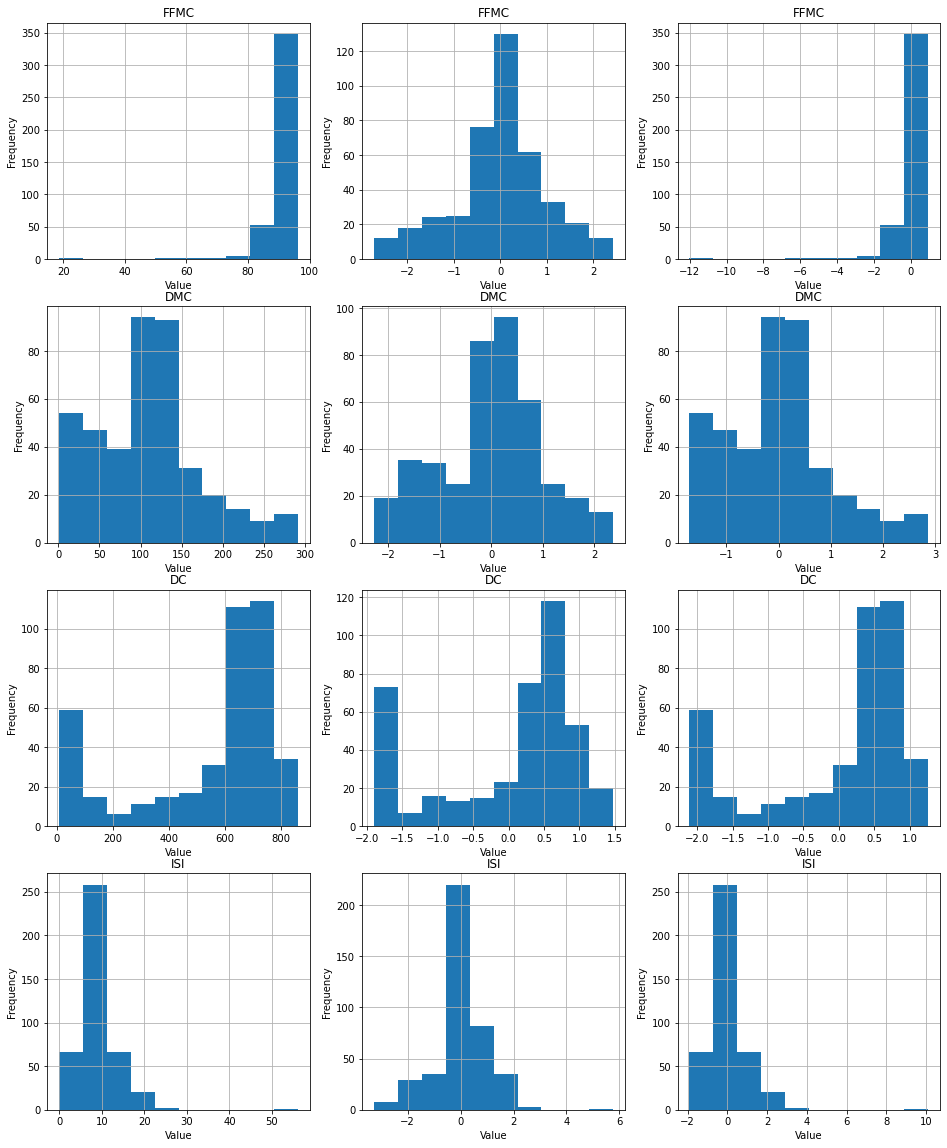

In [33]:
plt.figure(figsize=(16, 20))

plt.subplot(4, 3, 1)
plt.hist(XTrain['FFMC'])
plt.grid(True)
plt.title('FFMC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(4, 3, 2)
plt.hist(XTrainPT['FFMC'])
plt.grid(True)
plt.title('FFMC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(4, 3, 3)
plt.hist(XTrainSC['FFMC'])
plt.grid(True)
plt.title('FFMC')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.subplot(4, 3, 4)
plt.hist(XTrain['DMC'])
plt.grid(True)
plt.title('DMC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(4, 3, 5)
plt.hist(XTrainPT['DMC'])
plt.grid(True)
plt.title('DMC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(4, 3, 6)
plt.hist(XTrainSC['DMC'])
plt.grid(True)
plt.title('DMC')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.subplot(4, 3, 7)
plt.hist(XTrain['DC'])
plt.grid(True)
plt.title('DC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(4, 3, 8)
plt.hist(XTrainPT['DC'])
plt.grid(True)
plt.title('DC')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(4, 3, 9)
plt.hist(XTrainSC['DC'])
plt.grid(True)
plt.title('DC')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.subplot(4, 3, 10)
plt.hist(XTrain['ISI'])
plt.grid(True)
plt.title('ISI')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(4, 3, 11)
plt.hist(XTrainPT['ISI'])
plt.grid(True)
plt.title('ISI')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(4, 3, 12)
plt.hist(XTrainSC['ISI'])
plt.grid(True)
plt.title('ISI')
plt.xlabel('Value')
plt.ylabel('Frequency')


plt.show()

In [30]:
print ('Training Set: {} rows\n\nTest Set: {} rows'.format(XTrain.shape[0], XTest.shape[0]))

Training Set: 413 rows

Test Set: 104 rows


### Classification

#### Try a bunch of different models (Play with parameters and pick best one)

In [42]:
def evaluateModel(model, XTest, YTest):
    
    prediction = None
    predictions = model.predict(XTest)

    print('Accuracy: ', accuracy_score(YTest, predictions))
    print("Precision:",precision_score(YTest, predictions))
    print("Recall:",recall_score(YTest, predictions))

In [44]:
def confusionMatrix(model, XTest, YTest):

    prediction = None
    predictions = model.predict(XTest)


    # Print the confusion matrix
    cm = confusion_matrix(YTest, predictions)

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize = 20)
    plt.colorbar()

    classNames = ['no burn', 'burn']

    tick_marks = np.arange(len(classNames))

    plt.xticks(tick_marks, classNames, fontsize = 20)
    plt.yticks(tick_marks, classNames, fontsize = 20)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('int'))

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      color = "white" if cm[i, j] > threshold else "black"
      plt.text(j, i, labels[i, j], horizontalalignment="center", color=color, fontsize = 20)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 20)
    plt.xlabel('Predicted label', fontsize = 20)
    plt.show()

In [54]:
def ROCCurve(model, XTest, YTest):

    YScores = model.predict_proba(XTest)

    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(YTest, YScores[:,1])

    # plot ROC curve
    fig = plt.figure(figsize=(9, 9))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate', fontsize = 20)
    plt.ylabel('True Positive Rate', fontsize = 20)
    plt.title('ROC Curve', fontsize = 20)
    plt.show()

    auc = roc_auc_score(YTest,YScores[:,1])
    print('\nAUC: ' + str(auc))

### Logistic Regression

LogisticRegression(C=10000.0, solver='liblinear') 

Accuracy:  0.5096153846153846
Precision: 0.5205479452054794
Recall: 0.7037037037037037


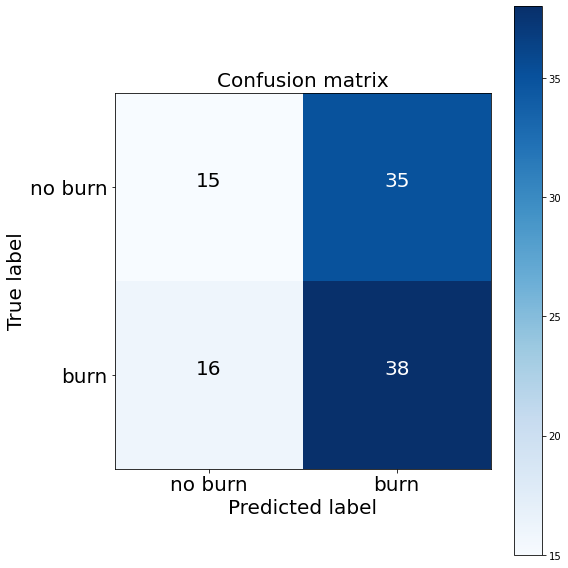

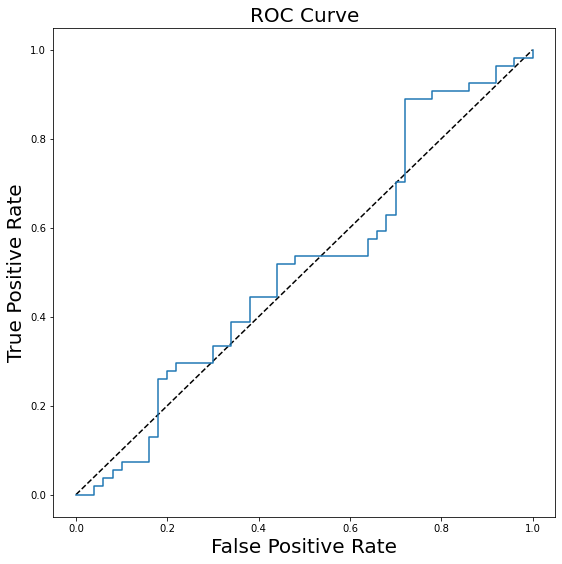


AUC: 0.5151851851851852


In [55]:
# Set regularization rate
reg = 0.0001

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(XTrain, YTrain['burn'])
print (model, '\n')

evaluateModel(model, XTest, YTest)
confusionMatrix(model, XTest, YTest)
ROCCurve(model, XTest, YTest)

### SVC

SVC(C=100.0, probability=True)


Accuracy:  0.5673076923076923
Precision: 0.56
Recall: 0.7777777777777778


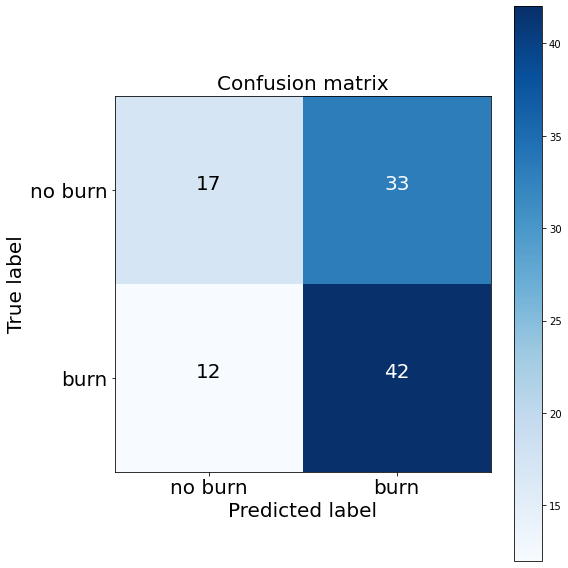

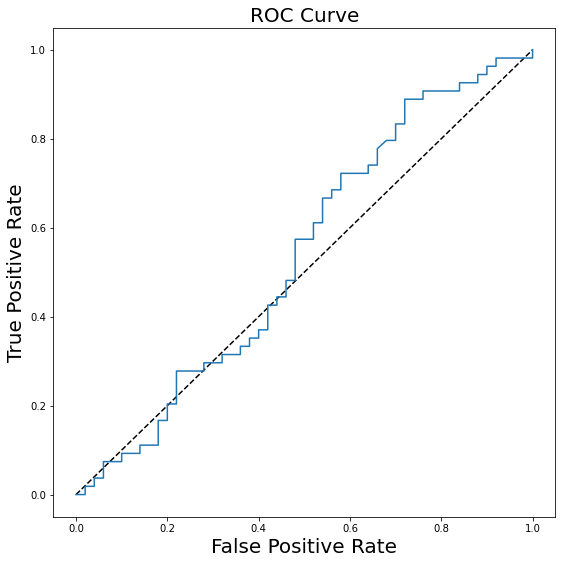


AUC: 0.5394444444444444


In [56]:
# Set regularization rate
reg = 0.01

model = None
# train a logistic regression model on the training set
model = SVC(C=1/reg, probability=True).fit(XTrain, YTrain['burn'])
print (model)
print('\n')

evaluateModel(model, XTest, YTest)
confusionMatrix(model, XTest, YTest)
ROCCurve(model, XTest, YTest)

In [ ]:
pca = None
pca = PCA() # estimate only 2 PCs

In [ ]:
X_new = pca.fit_transform(XTrain) # project the original data into the PCA space

In [ ]:
X_new = pd.DataFrame(X_new)

In [ ]:
plt.scatter(X_new[:,0], X_new[:,1], c=Y)
plt.show()

In [ ]:
pca = None
pca = PCA(n_components=2) # estimate only 2 PCs

In [ ]:
X_ScaleNew = pca.fit_transform(X_scaled) # project the original data into the PCA space

In [ ]:
X_ScaleNew = pd.DataFrame(X_ScaleNew)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca = None
pca = PCA(n_components=2) # estimate only 2 PCs

In [ ]:
X_PTNew = pca.fit_transform(XTrainPTDF) # project the original data into the PCA space

In [ ]:
plt.scatter(X_PTNew[:,0], X_PTNew[:,1], c=YTrain)
plt.show()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
model = None
model = LinearDiscriminantAnalysis()

In [ ]:
model.fit(X_ScaleNew, YTrain)

In [ ]:
XTest_new = pca.transform(XTest)

In [ ]:
model.score(XTest_new, YTest)

In [ ]:
predictions = model.predict(XTest_new)

In [ ]:
print('Accuracy: ', accuracy_score(YTest, predictions))

In [ ]:
print("Overall Precision:",precision_score(YTest, predictions))
print("Overall Recall:",recall_score(YTest, predictions))

In [ ]:
# Print the confusion matrix
cm = confusion_matrix(YTest, predictions)
print (cm)

In [ ]:
YScores = model.predict_proba(XTest_new)


%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(YTest, YScores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
auc = roc_auc_score(YTest,YScores[:,1])
print('AUC: ' + str(auc))